<a href="https://colab.research.google.com/github/FranciscoHernandez1998/lab2-SP1-17004812/blob/master/Lab_2_Clasificador_Binario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras import Sequential #Stack de Capas
from tensorflow.keras.utils import get_file #Descargar archivos de un URL
from tensorflow.keras.applications import ResNet50V2 #- Red neural conv. entrenada con mas de 1,000,000 de imgs. de 224x224 con 50 capas y 1000 categorias. 

#utilizando una nueva red neural convolucional - Inception V3
#from keras.applications.inception_v3 import InceptionV3 # Red neural conv. entrenada con imgs. de 299x299


from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
#Sirve para alimentar a los filtros de la siguiente capa, con un promedio de valores

from tensorflow.keras.preprocessing.image import ImageDataGenerator #permite crear bloques de imgs.

import os #provee funciones para interactuar con el sistema operativo
import shutil #operaciones de alto nivel sobre archivos, por ejemplo, copy
import numpy as np #Package for scientific computing
import PIL.Image as Image #representa una imagen PIL
import matplotlib.pylab as plt

plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})
seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

!pip install googleimagedownloader #comando de linux
from googleimagedownloader.googleimagedownloader import GoogleImageDownloader

#IMAGE_SIZE = (224, 299) # para inception

IMAGE_SIZE = (224, 224)

In [0]:
class_names = ['patrick','spongebob']
path = 'dataset/'

train_dir = os.path.join(path, 'train') #concatenador de componentes de path
validation_dir = os.path.join(path, 'validation')

train_ca_dir = os.path.join(train_dir, 'spongebob')  
train_im_dir = os.path.join(train_dir, 'patrick')  
validation_ca_dir = os.path.join(validation_dir, 'spongebob') 
validation_im_dir = os.path.join(validation_dir, 'patrick')  

if os.path.exists(path):
  shutil.rmtree(path)

os.makedirs(train_ca_dir)
os.makedirs(train_im_dir)
os.makedirs(validation_ca_dir)    
os.makedirs(validation_im_dir)

In [0]:
def manage_images(src, dest_train, dest_val, image_resize=IMAGE_SIZE, val_split=0.1, prefix=''):
  total = len(os.listdir(src))
  val = np.int(total*val_split)
  count = 0
  files = os.listdir(src)

  for file_name in files:
    try:
      dest = dest_train if count >= val else dest_val
      dest_file = os.path.join(dest, prefix + file_name) 

      img = Image.open(os.path.join(src,file_name))
      img.verify()
      # reopen because verify() was called
      # If you need to load the image after using this method, you must reopen the image file.
      # https://pillow.readthedocs.io/en/3.1.x/reference/Image.html
      img = Image.open(os.path.join(src,file_name))
      #resize
      img = img.resize(image_resize, Image.ANTIALIAS)
      #move
      img.save(dest_file)  
      count+=1 
    except Exception as e:
        print('Invalid image: ',file_name,e)
        if os.path.exists(dest_file):
          os.remove(dest_file)
  return


In [0]:
img_dir = os.path.realpath('Images/')

In [93]:
queries = ['squarepants','nickelodeon']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='spongebob '+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_ca_dir, validation_ca_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=spongebob squarepants&source=lnms&tbm=isch
Total Time : 0:00:02.477115
Invalid image:  89.jpg cannot write mode RGBA as JPEG
Invalid image:  3.jpg cannot identify image file '/content/Images/3.jpg'
Invalid image:  22.jpg cannot identify image file '/content/Images/22.jpg'
Invalid image:  84.jpg cannot identify image file '/content/Images/84.jpg'
Invalid image:  46.jpg cannot identify image file '/content/Images/46.jpg'
Invalid image:  17.jpg cannot write mode RGBA as JPEG
Invalid image:  57.jpg cannot identify image file '/content/Images/57.jpg'
Invalid image:  68.jpg cannot write mode RGBA as JPEG
Invalid image:  31.jpg cannot write mode RGBA as JPEG
Invalid image:  20.jpg cannot write mode RGBA as JPEG
Invalid image:  77.jpg cannot write mode RGBA as JPEG
Invalid image:  97.jpg cannot write mode RGBA as JPEG
Invalid image:  48.jpg cannot identify image file '/content/Images/48.jpg'
Invalid image:  38.jpg cannot identify image file '/content/Images/38

In [94]:
queries = ['star','pink']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='patrick '+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_im_dir, validation_im_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=patrick star&source=lnms&tbm=isch
Total Time : 0:00:04.398220
Invalid image:  75.jpg cannot write mode RGBA as JPEG
Invalid image:  42.jpg cannot write mode P as JPEG
Invalid image:  80.jpg cannot write mode RGBA as JPEG
Invalid image:  23.jpg cannot identify image file '/content/Images/23.jpg'
Invalid image:  53.jpg cannot write mode RGBA as JPEG
Invalid image:  17.jpg cannot write mode RGBA as JPEG
Invalid image:  34.jpg cannot write mode RGBA as JPEG
Invalid image:  33.jpg cannot write mode RGBA as JPEG
Invalid image:  74.jpg cannot identify image file '/content/Images/74.jpg'
Invalid image:  50.jpg cannot write mode P as JPEG
Invalid image:  44.jpg cannot write mode P as JPEG
Invalid image:  6.jpg cannot write mode P as JPEG
Invalid image:  10.jpg cannot write mode RGBA as JPEG
Invalid image:  76.jpg cannot write mode RGBA as JPEG
Invalid image:  11.jpg cannot write mode P as JPEG
Invalid image:  40.jpg cannot write mode RGBA as JPEG
Invalid image:

In [95]:
total_train = len(os.listdir(train_ca_dir))+ len(os.listdir(train_im_dir))
total_val = len(os.listdir(validation_ca_dir))+ len(os.listdir(validation_im_dir))

print('total training Spongebob images:', len(os.listdir(train_ca_dir)))
print('total training Patrick images:', len(os.listdir(train_im_dir)))

print('total validation Spongebob images:', len(os.listdir(validation_ca_dir)))
print('total validation Patrick images:', len(os.listdir(validation_im_dir)))
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training Spongebob images: 147
total training Patrick images: 127
total validation Spongebob images: 20
total validation Patrick images: 20
--
Total training images: 274
Total validation images: 40


In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [97]:
train_data_gen = train_image_generator.flow_from_directory(train_dir,
                                                           shuffle=True,
                                                           batch_size=32,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')

Found 274 images belonging to 2 classes.


In [98]:
val_data_gen = validation_image_generator.flow_from_directory(validation_dir,
                                                              target_size=IMAGE_SIZE,
                                                              class_mode='binary')

Found 40 images belonging to 2 classes.


In [0]:
image_batch, labels_batch = next(train_data_gen)

In [100]:
classifier_url ="https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4"

classifier = Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SIZE+(3,))
])

result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

In [101]:
labels_path = get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['space shuttle', 'toyshop', 'bib', 'comic book', 'Band Aid',
       'comic book', 'toyshop', 'Band Aid', 'jigsaw puzzle', 'tripod',
       'comic book', 'pencil box', 'punching bag', 'loudspeaker',
       'pencil box', 'pencil box', 'comic book', 'teddy', 'bib',
       'Band Aid', 'comic book', 'teddy', 'comic book', 'comic book',
       'comic book', 'envelope', 'safety pin', 'rubber eraser',
       'cowboy boot', 'totem pole', 'comic book', 'comic book'],
      dtype='<U30')

In [0]:
def plot_images(img_batch, labels, predicted_labels):
  plt.figure(figsize=(12,12))
  plt.subplots_adjust(hspace=0.5)
  for i in range(15):
    plt.subplot(6,5,i+1) 
    plt.imshow(img_batch[i])
    color = "green" if predicted_labels[i] == class_names[np.int(labels[i])] else "red"
    plt.title(predicted_labels[i], color=color)
    plt.axis('off')

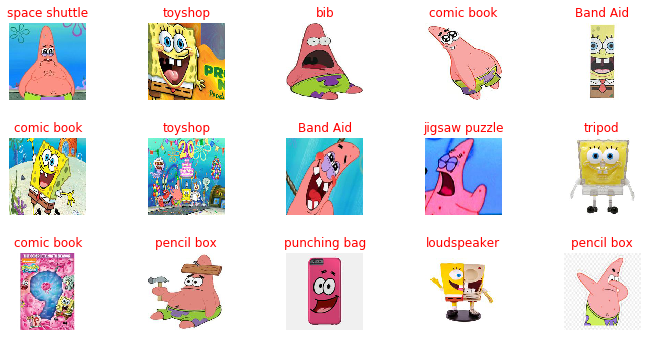

In [103]:
plot_images(image_batch, labels_batch, predicted_class_names)

In [0]:
feature_extractor_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [0]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=IMAGE_SIZE+(3,))

In [106]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 2048)


In [0]:
feature_extractor_layer.trainable = False

In [108]:
model = Sequential([
  feature_extractor_layer,
  Dense(1024, activation='relu'),#funciones de activacion, obtienen el output de un nodo
  Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_11 (KerasLayer)  (None, 2048)              23564800  
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 1025      
Total params: 25,664,001
Trainable params: 2,099,201
Non-trainable params: 23,564,800
_________________________________________________________________


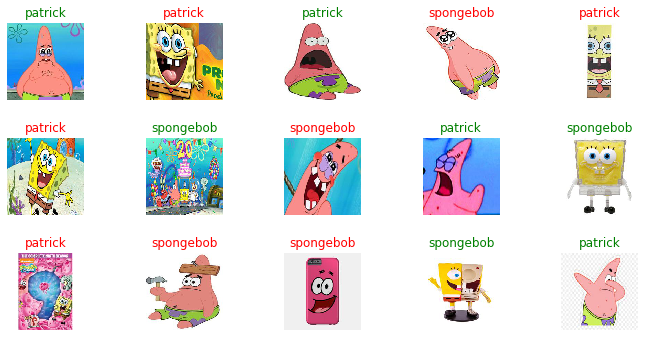

In [109]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()
plot_images(image_batch, labels_batch, predicted_class_names)

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [111]:
history = model.fit(
    train_data_gen,
    epochs=5,
    steps_per_epoch=5,
    validation_data=val_data_gen
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 5 steps, validate for 2 steps
Epoch 1/5
5/5 [==============================] - 20s 4s/step - loss: 0.3751 - accuracy: 0.8062 - val_loss: 0.3453 - val_accuracy: 0.9250
Epoch 2/5
5/5 [==============================] - 17s 3s/step - loss: 0.0655 - accuracy: 0.9750 - val_loss: 0.6067 - val_accuracy: 0.9000
Epoch 3/5
5/5 [==============================] - 17s 3s/step - loss: 0.1186 - accuracy: 0.9563 - val_loss: 0.0840 - val_accuracy: 0.9500
Epoch 4/5
5/5 [==============================] - 16s 3s/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 0.0326 - val_accuracy: 0.9750
Epoch 5/5
5/5 [==============================] - 16s 3s/step - loss: 0.0190 - accuracy: 0.9863 - val_loss: 0.0284 - val_accuracy: 0.9750


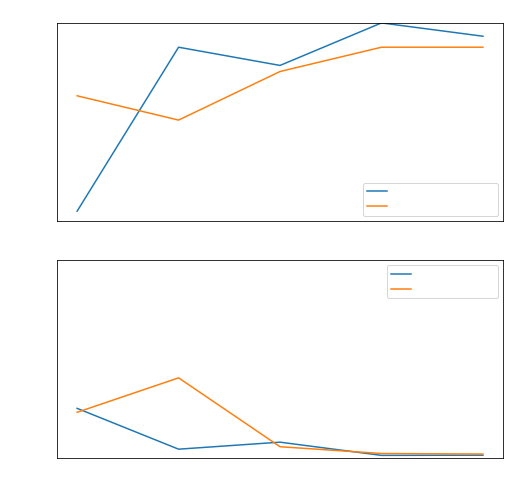

In [112]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

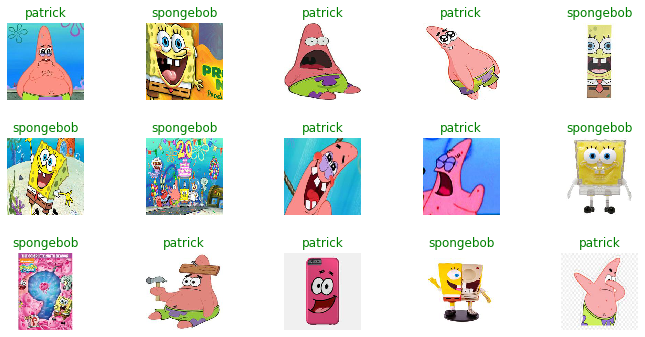

In [113]:
predictions = model(image_batch)
predicted_class_names = np.array(class_names)[np.rint(predictions).astype('int32')].flatten()

plot_images(image_batch, labels_batch, predicted_class_names)
